### Supervised Learning - Process flow

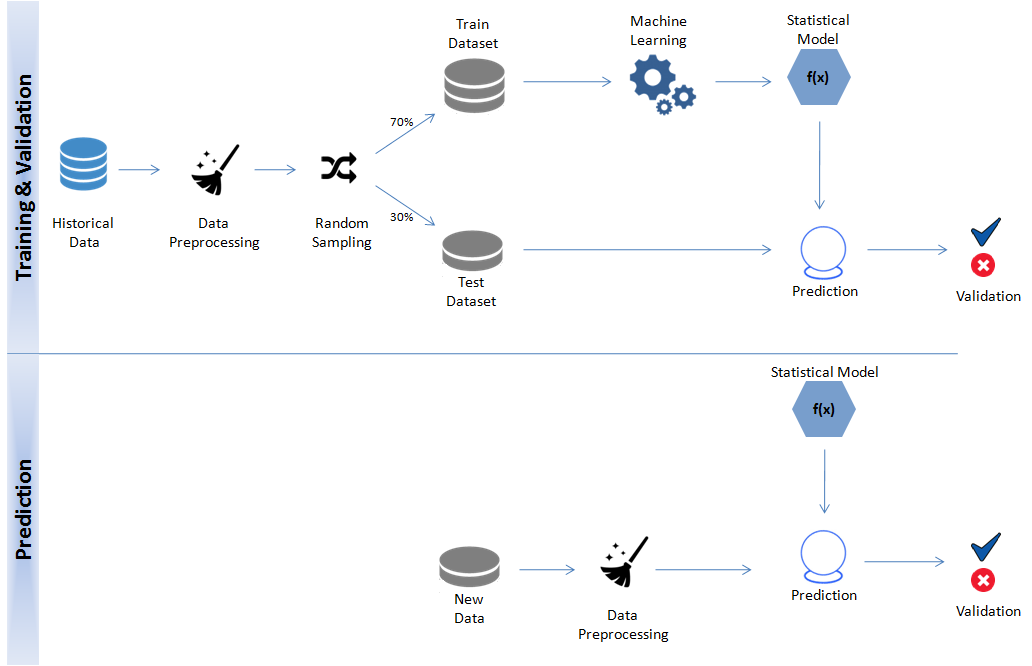

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/Supervised_Learning_Process_Flow.png', width=800)

### Multivariable and Multi-class Logistic Regression

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [4]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/mojtaba/virtual_env/machine_learning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Train logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression

# l1 regularization gives better results
lr = LogisticRegression(penalty='l1', C=10, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
from sklearn import metrics

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, lr.predict(X_train)))
print("Train - classification report :", metrics.classification_report(y_train, lr.predict(X_train)))

print("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))
print("Test - Confusion matrix :",metrics.confusion_matrix(y_test, lr.predict(X_test)))
print("Test - classification report :", metrics.classification_report(y_test, lr.predict(X_test)))

Train - Accuracy : 0.9809523809523809
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.94      0.97        32
          2       0.95      1.00      0.97        39

avg / total       0.98      0.98      0.98       105

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Logistic Regression Diagnostics

Overfitting occurs when the model fits the data very well capturing all the noises. 

Let's understand the issue by looking at some example dataset.

#### Fitting logistic regression for two independent variable which are linearly separatable

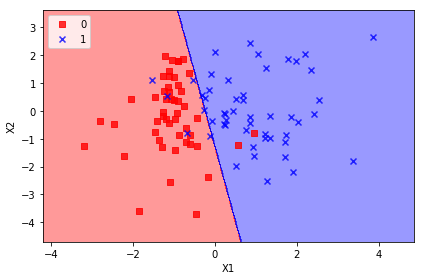

In [8]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# build a simple logistic regression model
clf = LogisticRegression().fit(X, y)

def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Fitting logistic regression for two independent variable which are non-linearly separatable

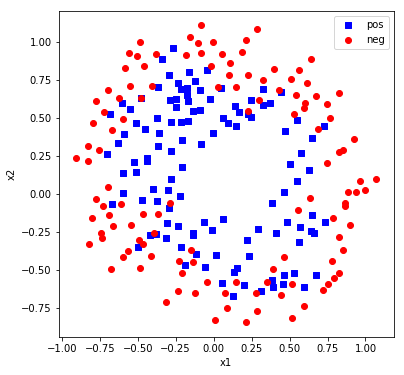

In [11]:
import pandas as pd
data = pd.read_csv('Data/LR_NonLinear.csv')

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

def draw_plot():
    plt.figure(figsize=(6, 6))
    plt.scatter(np.extract(pos, x1), 
                np.extract(pos, x2), 
                c='b', marker='s', label='pos')
    plt.scatter(np.extract(neg, x1), 
                np.extract(neg, x2), 
                c='r', marker='o', label='neg')
    plt.xlabel('x1');
    plt.ylabel('x2');
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend();

draw_plot()

#### Create higher order polynomials for independent variable

In [12]:
order_no = 6

# map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order=order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(iter())
   
out = map_features(data['x1'], data['x2'], order=order_no)
X = out.transpose()
y = data['class']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

By default l2 is the regularization for logistic regression

Train Accuracy for C=0.01:  0.6242424242424243
Test Accuracy for C=0.01:  0.6197183098591549
Train Accuracy for C=1:  0.8424242424242424
Test Accuracy for C=1:  0.8591549295774648
Train Accuracy for C=10000:  0.8606060606060606
Test Accuracy for C=10000:  0.7887323943661971


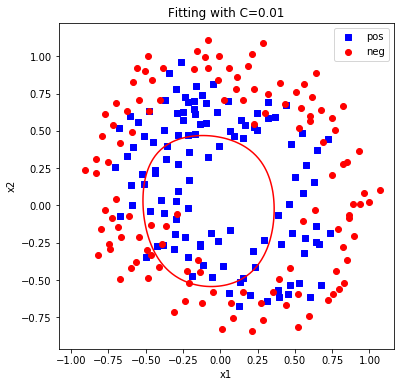

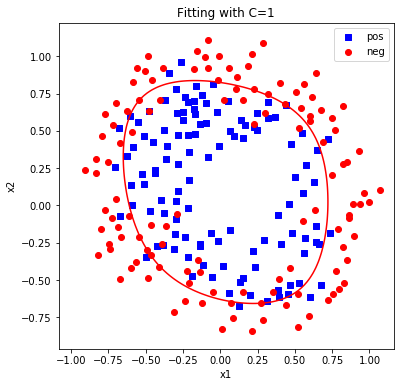

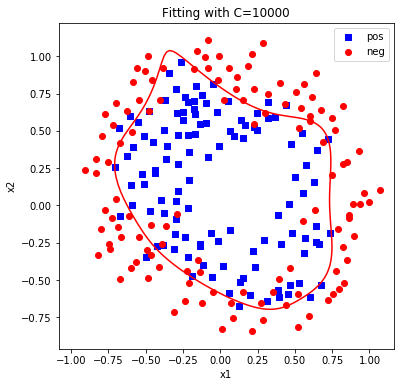

In [13]:
# function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order=order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels=[0], colors=['r'])

# fit with c = 0.01   
clf = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Train Accuracy for C=0.01: ', clf.score(X_train, y_train))
print('Test Accuracy for C=0.01: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=0.01')
draw_boundary(clf)
plt.legend(); 

# fit with c = 1    
clf = LogisticRegression(C=1).fit(X_train, y_train)
print('Train Accuracy for C=1: ', clf.score(X_train, y_train))
print('Test Accuracy for C=1: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=1')
draw_boundary(clf)
plt.legend();

# fit with c = 10000    
clf = LogisticRegression(C=10000).fit(X_train, y_train)
print('Train Accuracy for C=10000: ', clf.score(X_train, y_train))
print('Test Accuracy for C=10000: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=10000')
draw_boundary(clf)
plt.legend();